<a href="https://colab.research.google.com/github/RohanSiwach2001/pyth-codeio/blob/main/1bm19cs132_pandas_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [5]:
pd.read_csv("data.csv")

,year,industry_code_ANZSIC,industry_name_ANZSIC,rme_size_grp,variable,value,unit
0,2011,A,"Agriculture, Forestry and Fishing",a_0,Activity unit,46134,COUNT
1,2011,A,"Agriculture, Forestry and Fishing",a_0,Rolling mean employees,0,COUNT
2,2011,A,"Agriculture, Forestry and Fishing",a_0,Salaries and wages paid,279,DOLLARS(millions)
3,2011,A,"Agriculture, Forestry and Fishing",a_0,"Sales, government funding, grants and subsidies",8187,DOLLARS(millions)
4,2011,A,"Agriculture, Forestry and Fishing",a_0,Total income,8866,DOLLARS(millions)
...,...,...,...,...,...,...,...
15475,2020,all,All Industries,j_Grand_Total,Total income,733258,DOLLARS(millions)
15476,2020,all,All Industries,j_Grand_Total,Total expenditure,654872,DOLLARS(millions)
15477,2020,all,All Industries,j_Grand_Total,Operating profit before tax,77389,DOLLARS(millions)
15478,2020,all,All Industries,j_Grand_Total,Total assets,2396143,DOLLARS(millions)


In [6]:
import numpy as np
dates = pd.date_range("2011", periods=6)
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df


,A,B,C,D
2011-01-01,-0.592176,1.153661,1.224801,-3.236472
2011-01-02,-0.322114,0.288894,1.748697,-0.383751
2011-01-03,0.679207,0.542901,0.265884,0.071123
2011-01-04,0.895242,-1.553288,-0.042249,-0.497604
2011-01-05,0.081938,-0.429682,-0.376482,0.338238
2011-01-06,-0.210351,-1.757621,0.106287,0.817959


In [7]:
df2 = pd.DataFrame(
        {
            "A": 1.0,
            "B": pd.Timestamp("20130102"),
            "C": pd.Series(1, index=list(range(4)), dtype="float32"),
            "D": np.array([3] * 4, dtype="int32"),
            "E": pd.Categorical(["test", "train", "test", "train"]),
            "F": "foo",
        }
   )
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [8]:
df2.dtypes
df2


,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [9]:
df.head()
df.tail(3)
df.index
df.columns
df.shape
df.to_numpy() 
df.describe()
df.T
df.sort_index(axis=1, ascending=False)
df.sort_values(by="B")


,A,B,C,D
2011-01-06,-0.210351,-1.757621,0.106287,0.817959
2011-01-04,0.895242,-1.553288,-0.042249,-0.497604
2011-01-05,0.081938,-0.429682,-0.376482,0.338238
2011-01-02,-0.322114,0.288894,1.748697,-0.383751
2011-01-03,0.679207,0.542901,0.265884,0.071123
2011-01-01,-0.592176,1.153661,1.224801,-3.236472


In [13]:
#df["A"]
#df[0:3]
df["20130102":"20130104"]


,A,B,C,D


In [12]:
#df.loc[dates[0]]
#df.loc[:, ["A", "B"]]
#df.loc["20130102":"20130104", ["A", "B"]]
#df.loc["20130102", ["A", "B"]]
#df.loc[dates[0], "A"]  
df.at[dates[0], "A"]


-0.5921757420258541

In [15]:
#df.iloc[3]
#df.iloc[3:5, 0:2]
#df.iloc[[1, 2, 3], [0, 2]]
#df.iloc[ : , 1:3]
df.iloc[1, 1]
#df.iat[1, 1]


0.28889357914201697

In [21]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0] : dates[1], "E"] = 1

#df1.dropna(how="any") 
  #--> drop missing values 
#df
#a=df[df>0]
#a.fillna(value=5) #--> fill missing values
#a
pd.isna(df1) #--> for boolean mask where values are not present 
df1

,A,B,C,D,F,E
2011-01-01,0.000000,0.000000,1.224801,5,NaN,1.0
2011-01-02,-0.322114,0.288894,1.748697,5,NaN,1.0
2011-01-03,0.679207,0.542901,0.265884,5,NaN,NaN
2011-01-04,0.895242,-1.553288,-0.042249,5,NaN,NaN


In [22]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2) #--> multidimentional alignment 
df.sub(s, axis="index")


,A,B,C,D,F
2011-01-01,NaN,NaN,NaN,NaN,NaN
2011-01-02,NaN,NaN,NaN,NaN,NaN
2011-01-03,-0.320793,-0.457099,-0.734116,4.0,NaN
2011-01-04,-2.104758,-4.553288,-3.042249,2.0,NaN
2011-01-05,-4.918062,-5.429682,-5.376482,0.0,NaN
2011-01-06,NaN,NaN,NaN,NaN,NaN


In [23]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower() 


0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [24]:
s = pd.Series(np.random.randint(0, 7, size=10))
s.value_counts() 


5    6
6    1
3    1
1    1
0    1
dtype: int64

In [26]:
df = pd.DataFrame(np.random.randn(10, 4))
pieces = [df[:3], df[3:7], df[7:]] #--> breaking the data set 
pd.concat(pieces) #--> joining them back 


,0,1,2,3
0,-0.014677,0.057215,-0.457759,0.957690
1,1.808367,-0.885829,1.203466,0.727490
2,-1.438480,-0.887199,-0.234947,-1.077208
3,0.181585,-0.499884,1.165971,0.171721
4,0.819264,-0.872574,-0.416371,-0.527750
5,-0.636506,-1.720805,1.740854,-1.023734
6,0.611290,-0.289705,0.910754,-1.221686
7,-0.360523,-0.688478,1.371490,-1.122123
8,-1.701329,-0.233353,0.991910,-0.433361
9,0.230826,-0.080897,0.741944,0.786223


In [27]:
df = pd.DataFrame(
   {
   "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
   "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
   "C": np.random.randn(8),
   "D": np.random.randn(8),
   }
    )
   
df.groupby("A").sum()
df.groupby(["A", "B"]).sum()


C         D
A   B                        
bar one    2.104464 -1.587132
    three -0.796592 -0.404575
    two    0.989323 -0.972721
foo one    0.532074 -0.967750
    three -1.324533  0.707574
    two    1.579536  2.133156

In [29]:
tuples = list(
   zip(
   *[
   ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
   ["one", "two", "one", "two", "one", "two", "one", "two"],
   ]   )  )
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df2 = df[:4]
df2
stacked = df2.stack()  #--> stacking data 
stacked.unstack() #--> unstacking data 

stacked.unstack(1)
stacked.unstack(0)


first          bar       baz
second                      
one    A  1.146885 -0.459231
       B -0.059255  0.221389
two    A  0.015380 -0.236988
       B -0.156382 -1.466538

In [30]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample("5Min").sum()


2012-01-01    25609
Freq: 5T, dtype: int64

In [33]:
ts_utc = ts.tz_localize("UTC")
ts_utc


2012-03-06 00:00:00+00:00    0.205656
2012-03-07 00:00:00+00:00    0.361268
2012-03-08 00:00:00+00:00   -0.165409
2012-03-09 00:00:00+00:00    1.231282
2012-03-10 00:00:00+00:00    0.776934
Freq: D, dtype: float64

In [34]:
ts_utc.tz_convert("US/Eastern")


2012-03-05 19:00:00-05:00    0.205656
2012-03-06 19:00:00-05:00    0.361268
2012-03-07 19:00:00-05:00   -0.165409
2012-03-08 19:00:00-05:00    1.231282
2012-03-09 19:00:00-05:00    0.776934
Freq: D, dtype: float64

In [38]:
ps = ts.to_period()
ps.to_timestamp()


2012-01-01    1.129665
2012-02-01   -0.130975
2012-03-01    0.406594
2012-04-01   -0.760035
2012-05-01    0.917651
Freq: MS, dtype: float64

In [41]:
df = pd.DataFrame(
   {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
   )
df["grade"] = df["raw_grade"].astype("category")
df['grade']


0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [44]:

df["grade"].cat.categories = ["very good", "good", "very bad"] # -->Series.cat.catergories() 

df["grade"] = df["grade"].cat.set_categories(
   ["very bad", "bad", "medium", "good", "very good"]
   )
df["grade"]


0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [45]:
df.sort_values(by="grade")
df.groupby("grade").size()


grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

In [54]:
df = pd.DataFrame(
   {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
   )
df["grade"] = df["raw_grade"].astype("category")
df['grade']

df["grade"].cat.categories = ["very good", "good", "very bad"]  #-->Series.cat.catergories() 

df["grade"] = df["grade"].cat.set_categories(
   ["very bad", "bad", "medium", "good", "very good"]
   )
df["grade"]


0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

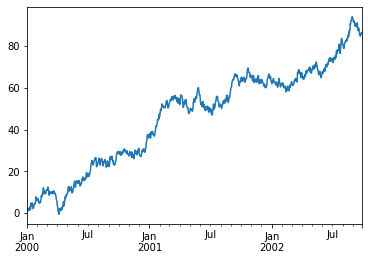

<Figure size 432x288 with 0 Axes>

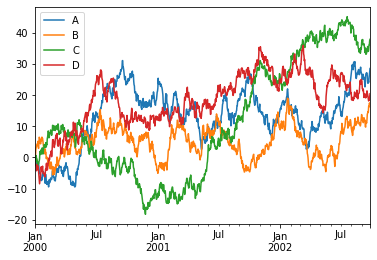

In [51]:
import matplotlib.pyplot as plt
plt.close() #--> used to close a figure window 

ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot();

df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"] )
  
df = df.cumsum()
plt.figure();
df.plot();
plt.legend(loc='best')
